# Project 1 - Unsupervised Learning Classification
## Due: July 15$^{th}$ 11:59 PM

In this project, we are going to build classifiers to classify unlabeled datasets. While we do not implement machiine learning algorithms but apply built-in algorithms from `sklearn`, you are going to develop models. 
 
- Data Sets: `CS559_Summer21_Project1_01.csv` and `CS559_Summer21_Project1_02.csv`
- Data Information: Unlabeled Data - onlly target variable, `Class`, is known. 
- Rules: You must not use any other libraries than are provided below. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### For each data set: 
- Modelings: You are going to build four different classifiers using unsupervised learning techniques (*clustering, dimention reduction*) and supervised learning techniques (*KNN, LDA, Logistic Regression, Gaussian Process, and SVM*). The models can be either a single or a mix of any algorithms (e.g., Unsupervised Learning+Unsupervised Learning, Unsupervised Learning + Supervised Learning, Supervised Learning + Supervised Learning). Despite the freedome of modeling, you must explain your work and justify your workflow. 
- Final Models: You can develop many models you want and you only need to report the best accuracies of models in the following conditions. 
    1. Unsupervised Learning Classifier
    2. Non-parametric Supervised Learning Classifier (KNN, Linear SVM) 
    3. Probabilitic Supervised Learning Classifier (Logistic Regression)
    4. Supervised Learning Classifier with Kernal (Kernal SVM)
    
- Accuracy Report: The accuracy is the average of train and test accuracy. The accuracy must be reported in Data Frame format as an example shown below. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 2 | 35%|
| 1 | Unsupervised Learning Classifier | -- | -- |
| 2 | Non-parametric Supervised Learning Classifier | -- | -- |
| 3 | Probabilitic Supervised Learning Classifier | -- | -- |
| 4 | Supervised Learning Classifier with Kernal | -- | -- |
- The average accuracy of simple logistic regression without feature engineering is 35%. 
### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |

- Please have visualizations to support your explanations. 

### Submission:
- Submit the notebook and its exported HTML files. 
- Considering the working period of this project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split

In [3]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

### Project 1 Starts from here: `CS559_Summer21_Project1_01.csv`

#### Model 1: Unsupervised Learning Classifier
- Classify using clustering method before and after feature engineering and dimension reduction. 
- Explain the feature enginnering process and the improvement of result when it was done. 
- Explain the role of dimension reduction to the result improvement.  
- Explain the ways to improve the unsupervised learning classifier. 

In [4]:
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

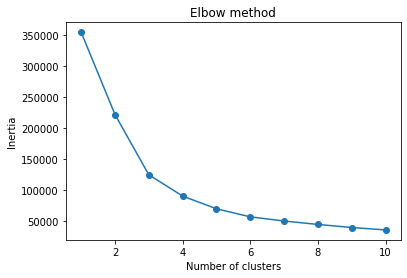

,Inertia
n = 1,354559.878259
n = 2,221855.088893
n = 3,124745.771597
n = 4,90439.797944
n = 5,69946.553806
n = 6,56911.861457
n = 7,50204.237365
n = 8,44691.191295
n = 9,39746.971996
n = 10,35851.217814


In [5]:
data = pd.read_csv("CS559_Summer21_Project1_01.csv")
plot_inertia(kmeans, data[['var2', 'var2.1']], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# k = 3 as seen from the elbow method graph

#### Before feature engineering:

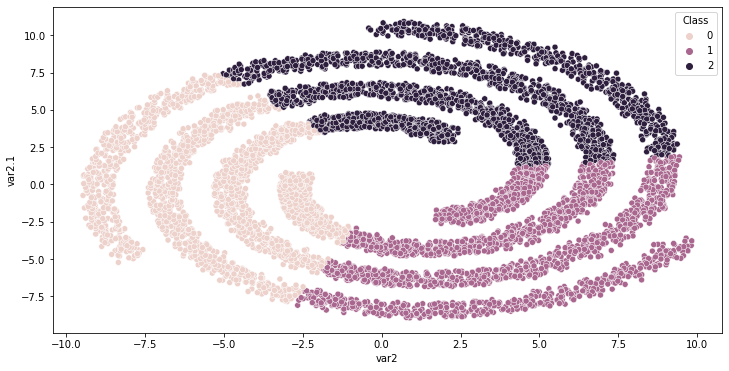

In [216]:
# Before feature engineering
k = 3
kmeans = KMeans(n_clusters = k).fit(data[['var2', 'var2.1']])
data2 = pd.DataFrame({'var2' : data['var2'], 'var2.1' : data['var2.1'], 'Class' : kmeans.labels_})
plot_2D(data2, data2['var2'], data2['var2.1'], data2['Class'])

In [217]:
# Calculating accuracy
sum = 0
for i in range(len(data['Class'])):
    if data['Class'][i] == data2['Class'][i]+1:
        sum += 1
kmeans_accuracy = (sum/7500)*100
print(kmeans_accuracy)

30.573333333333334


#### After feature engineering

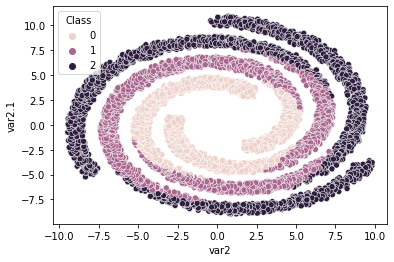

In [51]:
eucl_dist = []
for i in range(len(data['var2'])):
    eucl_dist.append(((data['var2'][i])**2 + (data['var2.1'][i])**2)**(1/2))
data3 = pd.DataFrame({'var2.2' : eucl_dist})
kmeans = KMeans(n_clusters = 3).fit(data3[['var2.2']])
data3.insert(1, 'Class', kmeans.labels_, True)
plot_2D(data2, data2['var2'], data2['var2.1'], data3['Class'])

In [9]:
# Calculating feature engineered accuracy
sum = 0
for i in range(len(data['Class'])):
    if data['Class'][i] == data3['Class'][i]+1:
        sum += 1
kmeans_eng_accuracy = (sum/7500)*100
print(kmeans_eng_accuracy)

39.93333333333333


The feature engineering used here was euclidean distance from the origin instead of the standard (x,y) coordinates. Since the data is spiraling away from the origin and the pattern is clearly non-linear, the distance from the origin is probably more useful than knowing the quadrant the data is in.

However, we can see the accuracy with the feature-engineering is no better than before. We're still only getting about a third of the points right because instead of dividing the entire graph into thirds like before, each individual spiral is being divided into thirds which results in a similar overall accuracy. To improve this, we need to somehow alter the data (probably via a kernel) so that we can apply a non-linear decision boundary.

#### Model 2: Non-parametric Supervised Learning Classifier
- Use both KNN and linear SVM with a raw dataset (no feature engineering). 
- For KNN, determine the limit of K value by testing various K value. Justify the threshold K value. 
- For linear SVM, explain the failure of using linear SVM. 

#### KNN

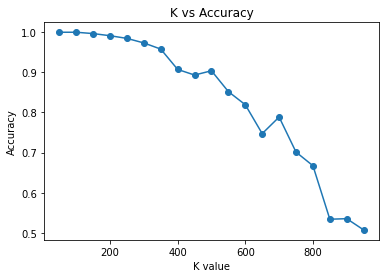

In [104]:
data_vars = data.drop(data.columns[[0,3]], axis=1)
target = data['Class']

accuracy = []
for k in range(50, 1000, 50):
    X_train, X_test, y_train, y_test = train_test_split(data_vars, target, train_size=0.8, stratify=target)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    accuracy.append(knn.score(X_test, y_test))
    
plt.plot(range(50, 1000, 50), accuracy, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [105]:
# We can see from the graph that the accuracy starts to drop once k passes 200.
# Therefore we can use 200 as our k value. We want to use the largest value possible because small values
# of k tend to be unreliable for classification.
X_train, X_test, y_train, y_test = train_test_split(data_vars, target, train_size=0.8, stratify=target)
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn_train_accuracy = knn.score(X_train, y_train)*100
knn_test_accuracy = knn.score(X_test, y_test)*100
print("train: ", knn_train_accuracy, " test: ", knn_test_accuracy)
knn_accuracy = (knn_train_accuracy + knn_test_accuracy)/2

train:  99.0  test:  99.53333333333333


#### SVC

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_vars, target, train_size=0.8, stratify=target)
clf = SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)
clf.predict(X_test)
SVC_accuracy = clf.score(X_test, y_test)*100
print(SVC_accuracy)

37.8


SVC is a poor classifier for the data here because the pattern is not linear. The data forms a swirl pattern with three classes
and if you try and use a linear boundary to classify the data you're only going to get about of the third of the points
classified correctly, hence the accuracy of 37.8%. This can also be seen in the kmeans method.

#### Model 3: Probabilitic Supervised Learning Classifier
- Simple logistic regression is already done and resulted the accruacy value of 35%. 
- Improve the model and explain the workflow. 

In [127]:
lgr_data = []
for i in range(len(data['var2'])):
    lgr_data.append(np.log( (((data['var2'][i])**2 + (data['var2.1'][i])**2)**(1/2)) / (i+1) ) / (i+i+1) )
X_train, X_test, y_train, y_test = train_test_split(lgr_data, target, train_size=0.8, stratify=target)
lgr = LogisticRegression()
lgr.fit(np.reshape(X_train, (-1, 1)), y_train)
lgr.predict(np.reshape(X_test, (-1, 1)))
lgr_train_accuracy = lgr.score(np.reshape(X_train, (-1, 1)), y_train)*100
lgr_test_accuracy = lgr.score(np.reshape(X_test, (-1, 1)), y_test)*100
print("train: ", lgr_train_accuracy, " test: ", lgr_test_accuracy)
lgr_accuracy = (lgr_train_accuracy + lgr_test_accuracy)/2

train:  86.58333333333333  test:  88.93333333333334


In order to improve our logistic regression, I need to somehow transform the data so that a linear boundary can be applied. Since I don't have access to any kernels with the sklearn LogisticRegression function, I looked up the function for a spiral which is this:  $r = ae^{θcotb}$ and I tried my best to reverse engineer it to work with the data that we have. First I calculated r by using var2 and var2.1 and finding the euclidean distance from the origin. Then I divide that by i+1 which is a stand-in for $a$, took the natural log, and divided by i+i+1 which is a stand-in for $cotb$. By some miracle, this actually gave a relatively good increase in accuracy over the linear model.

#### Model 4: Supervised Learning Classifier with Kernal
- Explain the benefits of using Kernal SVM. 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(data_vars, target, train_size=0.8, stratify=target)
svm = SVC(kernel='rbf', C = 1.0)
svm.fit(X_train, y_train)
svm.predict(X_test)
SVM_train_accuracy = svm.score(X_train, y_train)*100
SVM_test_accuracy = svm.score(X_test, y_test)*100
SVM_accuracy = (SVM_train_accuracy + SVM_test_accuracy)/2
print("train: ", SVM_train_accuracy, " test: ", SVM_test_accuracy)

train:  99.83333333333333  test:  99.6


The Kernel is very important for our usage of SVM in this dataset because it allows us to transform our data so that we can use a non-linear decision surface. As we saw with Linear SVM and KMeans, trying to use a linear boundary results in poor accuracy so being able to transform the training set of data so that a non-linear decision surface can fit allows us to get high accuracy when we use the model on the test data.

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [128]:
Result1 = {'Model Number': [0,1,2,3,4], 'Algorithm(s)':['Logistic Regression','KMeans','KNN','Impr. Logistic Reg.','Kernel SVM'],
           'Number of Features': [2,2,2,1,2],
           'Accuracy':[35,kmeans_accuracy,knn_accuracy,lgr_accuracy,SVM_accuracy]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm(s)','Number of Features','Accuracy'])



### Project 1 Starts from here: `CS559_Summer21_Project1_02.csv`
- Do same as above.

#### Model 1: Unsupervised Learning Classifier
- Classify using clustering method before and after feature engineering and dimension reduction. 
- Explain the feature enginnering process and the improvement of result when it was done. 
- Explain the role of dimension reduction to the result improvement.  
- Explain the ways to improve the unsupervised learning classifier. 

In [181]:
data02 = pd.read_csv("CS559_Summer21_Project1_02.csv")
data02_vars = data02.drop(data02.columns[[0,9]], axis=1)
target02 = data02['Class']

### I'm a bit confused on what kind of algorithm to use for model 1 here. It says to use a clustering method but as far as I can tell there is no way to measure accuracy for a clustering algorithm. Instead, I used GPC.

#### Before feature engineering

In [169]:
# Before feature engineering
X_train, X_test, y_train, y_test = train_test_split(data02_vars, target02, train_size=0.8, stratify=target02)
gpc = GaussianProcessClassifier().fit(X_train, y_train)
gpc.predict(X_test)
gpc_train_accuracy = gpc.score(X_train, y_train)*100
print(gpc_train_accuracy)

99.83333333333333


In [170]:
gpc_test_accuracy = gpc.score(X_test, y_test)*100
print(gpc_test_accuracy)
gpc_accuracy = (gpc_train_accuracy + gpc_test_accuracy)/2

99.8


#### After feature engineering

In [200]:
data02_vars.corr()

,var1,var2,var3,var4,var5,var6,var7,var8
var1,1.000000,-0.001150,-0.196908,0.160217,0.441620,-0.261986,-0.245783,0.102911
var2,-0.001150,1.000000,-0.396994,0.210011,0.026827,0.032716,0.371534,-0.243999
var3,-0.196908,-0.396994,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108
var4,0.160217,0.210011,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198
var5,0.441620,0.026827,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076
var6,-0.261986,0.032716,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161
var7,-0.245783,0.371534,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155
var8,0.102911,-0.243999,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000


From the correlation matrix, there isn't any extreme correlation between particular features so none of the features can be removed.

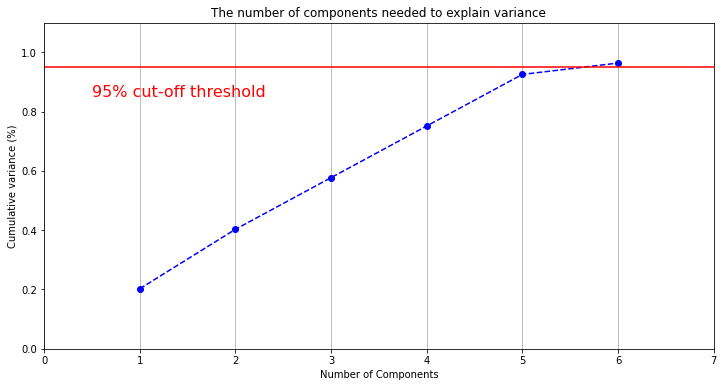

In [212]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data02_vars)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)

# source for code to make graph: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
fig, ax = plt.subplots()
xi = np.arange(1, 7, 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From the graph, we can see that we need 6 components for our PCA.

In [227]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data02_vars)
X_train, X_test, y_train, y_test = train_test_split(data_rescaled, target02, train_size=0.8, stratify=target02)
pca = PCA(n_components = 6)
pca.fit(X_train, y_train)
gpc = GaussianProcessClassifier()
gpc.fit(pca.transform(X_train), y_train)
gpc_eng_train_accuracy = gpc.score(pca.transform(X_train), y_train)*100
gpc_eng_test_accuracy = gpc.score(pca.transform(X_test), y_test)*100
print("train: ", gpc_eng_train_accuracy, " test: ", gpc_eng_test_accuracy)
gpc_eng_accuracy = (gpc_eng_train_accuracy+gpc_eng_test_accuracy)/2

train:  100.0  test:  100.0


Unfortunately, scaling the features and using PCA did not result in any significant difference in the accuracy of GPC. This seems to be because GPC already had very high accuracy prior to doing any kind of preprocessing.

#### Model 2: Non-parametric Supervised Learning Classifier
- Use both KNN and linear SVM with a raw dataset (no feature engineering). 
- For KNN, determine the limit of K value by testing various K value. Justify the threshold K value. 
- For linear SVM, explain the failure of using linear SVM. 

#### KNN

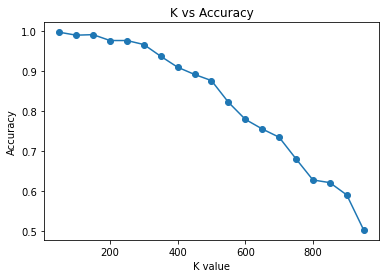

In [171]:
accuracy = []
for k in range(50, 1000, 50):
    X_train, X_test, y_train, y_test = train_test_split(data02_vars, target02, train_size=0.8, stratify=target02)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    accuracy.append(knn.score(X_test, y_test))
    
plt.plot(range(50, 1000, 50), accuracy, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

For KNN with dataset 2, we can see that the accuracy drops beyond a k of 150. Having a k of 150 seems large enough to allow for reproducible results while still maintaining a high accuracy.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(data02_vars, target02, train_size=0.8, stratify=target02)
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn02_train_accuracy = knn.score(X_train, y_train)*100
knn02_test_accuracy = knn.score(X_test, y_test)*100
print("train: ", knn02_train_accuracy, " test: ", knn02_test_accuracy)
knn02_accuracy = (knn02_train_accuracy + knn02_test_accuracy)/2

train:  99.18333333333334  test:  98.86666666666667


#### SVC

In [185]:
X_train, X_test, y_train, y_test = train_test_split(data02_vars, target02, train_size=0.8, stratify=target02)
clf = SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)
clf.predict(X_test)
SVC_accuracy = clf.score(X_test, y_test)*100
print(SVC_accuracy)

100.0


SVC is not useful here despite the high accuracy because the accuracy is artificially inflated by the features that haven't been engineered properly.

#### Model 3: Probabilitic Supervised Learning Classifier
- Simple logistic regression is already done and resulted the accruacy value of 35%. 
- Improve the model and explain the workflow. 

In [230]:
lgr_data = []
for i in range(len(data02_vars['var1'])):
    lgr_data.append(np.log( (((data02_vars['var1'][i])**2 + (data02_vars['var2'][i])**2)**(1/2)) / (i+1) ) / (i+i+1) )
    
d = {'var1' : lgr_data, 'var3' : data02_vars['var3'], 'var4' : data02_vars['var4'], 'var5' : data02_vars['var5'],
    'var6' : data02_vars['var6'], 'var7' : data02_vars['var7'], 'var8' : data02_vars['var8']}
df_lgr = pd.DataFrame(data=d)

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_lgr)
X_train, X_test, y_train, y_test = train_test_split(data_rescaled, target02, train_size=0.8, stratify=target02)
pca = PCA(n_components = 5)
pca.fit(X_train, y_train)

lgr = LogisticRegression()
lgr.fit(pca.transform(X_train), y_train)
lgr02_train_accuracy = lgr.score(pca.transform(X_train), y_train)*100
lgr02_test_accuracy = lgr.score(pca.transform(X_test), y_test)*100
print("train: ", lgr02_train_accuracy, " test: ", lgr02_test_accuracy)
lgr02_accuracy = (lgr02_train_accuracy + lgr02_test_accuracy)/2

train:  100.0  test:  100.0


As with the improved logistic regression from the first dataset, I used a modified version of the spiral function to try and modify vars 1 and 2. Then I took my new feature, added it with vars 3-8, applied scaling, and used PCA but with 5 features instead of 6 due to the combining of vars 1 and 2. This resulted in a very high accuracy for LGR. However, I am slightly suspicious of this result because my formula includes a bit of guesswork as shown before and the accuracy here seems to be higher than other, more proven methods. So there might be some issue with how I'm processing the data here, but I'm not sure what it would be.

#### Model 4: Supervised Learning Classifier with Kernal
- Explain the benefits of using Kernal SVM. 

In [228]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data02_vars)
X_train, X_test, y_train, y_test = train_test_split(data_rescaled, target02, train_size=0.8, stratify=target02)
pca = PCA(n_components = 6)
pca.fit(X_train, y_train)
svm = SVC(kernel='rbf', C = 1.0)
svm.fit(pca.transform(X_train), y_train)
SVM02_train_accuracy = svm.score(pca.transform(X_train), y_train)*100
SVM02_test_accuracy = svm.score(pca.transform(X_test), y_test)*100
SVM02_accuracy = (SVM02_train_accuracy + SVM02_test_accuracy)/2
print("train: ", SVM02_train_accuracy, " test: ", SVM02_test_accuracy)

train:  100.0  test:  99.93333333333332


As before, using a kernel is beneficial for SVM in this dataset because it allows us to transform our data so that we can use a non-linear decision surface. Even with the added variables, the first two features of this dataset still form a spiral pattern so being able to use a non-linear classifier is ideal.

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [233]:
Result2 = {'Model Number': [0,1,2,3,4], 'Algorithm(s)':['Logistic Regression','GPC','KNN','Impr. Logistic Reg.','Kernel SVM'],
           'Number of Features': [2,6,8,5,6],
           'Accuracy':[35,gpc_eng_accuracy,knn02_accuracy,lgr02_accuracy,SVM02_accuracy]}

Result2 = pd.DataFrame(Result2, columns = ['Model Number', 'Algorithm(s)','Number of Features','Accuracy'])


#### Conclusion:

Summarize your work and result. 

As I've stated before, we're dealing with non-linear data here so we can clearly see that the algorithms that are made for linear classification perform poorly. For dataset 1, kmeans doesn't work well because it likes to form roughly spherical clusters while the data is in an interwoven spiral. Linear SVC doesn't work because the data isn't linear. Logistic Regression needs the data to be modified before it can work with some level of accuracy. KNN and Kernel SVM work just fine on the data because they are the only algorithms built to work on non-linear classification.

In [234]:
print (Result1)
print (Result2)

   Model Number         Algorithm(s)  Number of Features   Accuracy
0             0  Logistic Regression                   2  35.000000
1             1               KMeans                   2  33.253333
2             2                  KNN                   2  99.266667
3             3  Impr. Logistic Reg.                   1  87.758333
4             4           Kernel SVM                   2  99.716667
   Model Number         Algorithm(s)  Number of Features    Accuracy
0             0  Logistic Regression                   2   35.000000
1             1                  GPC                   6  100.000000
2             2                  KNN                   8   99.025000
3             3  Impr. Logistic Reg.                   5  100.000000
4             4           Kernel SVM                   6   99.966667
